# Introduction to python for hydrologists &mdash; `matplotlib` &mdash; 2D and 3D plotting

This IPython Notebook is based on a notebook developed by J.R. Johansson (jrjohansson@gmail.com $-$ http://jrjohansson.github.io)

The latest version of this [jupyter notebook](http://ipython.org/notebook.html) lecture is available at [https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb](https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb).

The other notebooks in this lecture series are indexed at [https://github.com/jrjohansson/scientific-python-lectures](https://github.com/jrjohansson/scientific-python-lectures).

In [1]:
%matplotlib inline

In [2]:
from IPython.display import clear_output, display

import pathlib as pl

output_path = pl.Path("./data/matplotlib")
output_path.mkdir(exist_ok=True, parents=True)

## Introduction

``matplotlib`` is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS.
* GUI for interactively exploring figures *and* support for headless generation of figure files (useful for batch jobs).

One of the of the key features of ``matplotlib`` that that makes `matplotlib` highly suitable for generating figures for scientific publications is that all aspects of the figure can be controlled *programmatically*. This is important for reproducibility and convenient when one needs to regenerate the figure with updated data or change its appearance. 


Import the `matplotlib.pyplot` module under the name `plt` (a better approach to using `python` packages since the `matplotlib.pyplot` namespace is explicitly defined):

In [3]:
import matplotlib.pyplot as plt
import numpy as np

Find the Errorbar subsampling example in the [matplotlib gallery](https://matplotlib.org/stable/gallery/). Copy the code in to the empty code block below and execute the code.

Congratulations you have created your first `matplotlib` figure. Let's go further down the `matplotlib` rabbit hole.




# The `matplotlib` object-oriented API

The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global (such as the MATLAB-like API). 

The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot. 

When using the object-oriented API, a reference to the newly created figure instance is stored in the `fig` variable, and from it a new axis instance `axes` is created using the `add_axes` method in the `Figure` class instance `fig`:

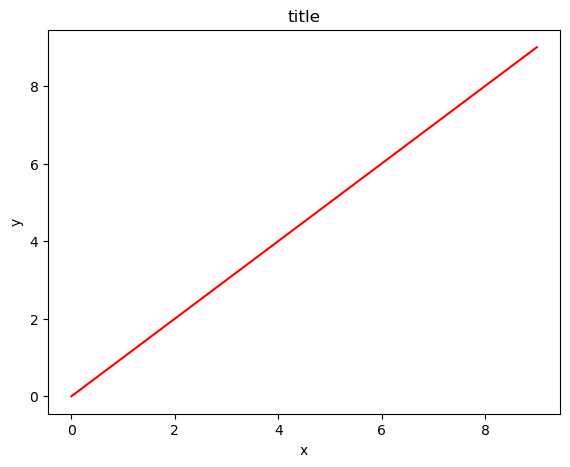

In [4]:
fig = plt.figure()

axes = fig.add_axes(
    [0.1, 0.1, 0.8, 0.8]
)  # left, bottom, width, height (range 0 to 1)
x = np.arange(10)
y = np.arange(10)
axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

### Inset figures

Although a little bit more code is involved, the advantage is that you now have full control of where the plot axes are placed, and you can easily add more than one axis to the figure:

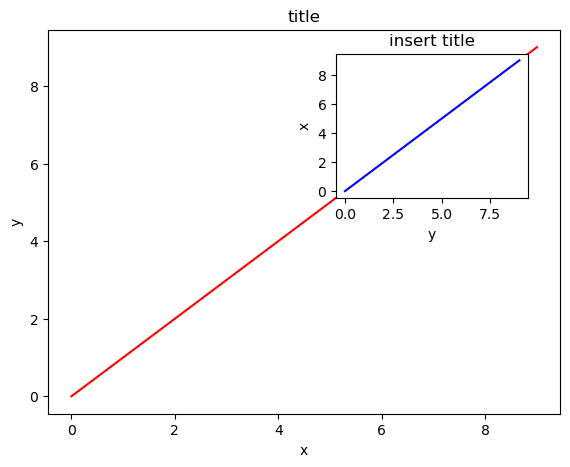

In [5]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])  # main axes
axes2 = fig.add_axes([0.55, 0.55, 0.3, 0.3])  # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, color='blue')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

Copy the code in the previous block to the empty code block below. Then we will modify the location of the inset. The coordinates of the plots are in page coordinates `(fig.add_axes([lowerleftx, lowerlefty, xlen, ylen]))`.

### Figures with subplots

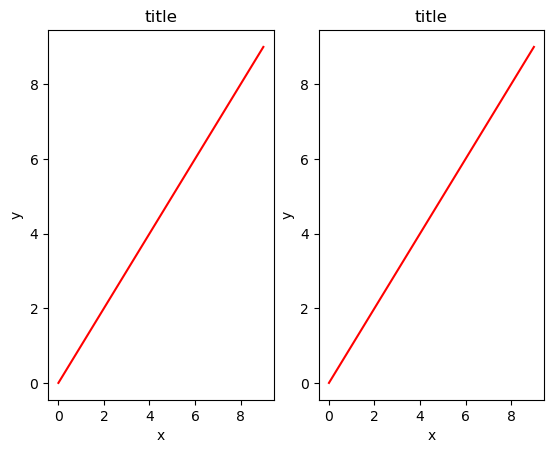

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title');

## Legends, labels and titles

Now that the basics of how to create a figure canvas and add axes instances to the canvas have been covered, methods for decorating a figure with titles, axis labels, and legends will be covered.

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

```python
ax.set_title('title')
```

**Axis labels**

Similarly, the labels of the X and Y axes can be set with the methods `set_xlabel` and `set_ylabel`:

```python
ax.set_xlabel('x')
ax.set_ylabel('y')
```

**Legends**

Legends for curves in a figure can be added in two ways. One method is to use the `legend` method of the axis object and pass a list/tuple of legend texts for the previously defined curves:

```python
ax.legend(['curve1', 'curve2', 'curve3'])
```


The method described above follows the MATLAB API. It is somewhat prone to errors and unflexible if curves are added to or removed from the figure (resulting in a wrongly labelled curve).

A better method is to use the `label="label text"` keyword argument when plots or other objects are added to the figure, and then using the `legend` method without arguments to add the legend to the figure: 

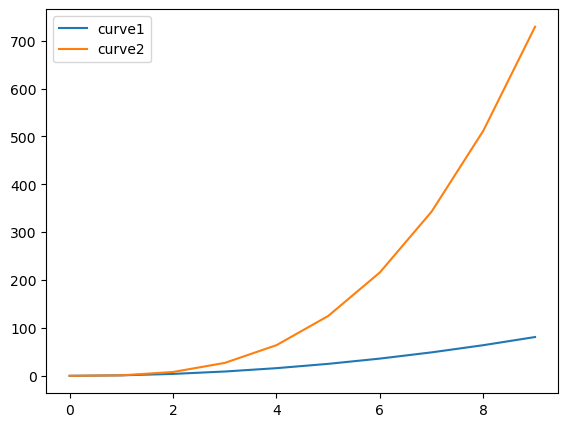

In [7]:
fig = plt.figure()
ax = fig.add_axes(
    [0.1, 0.1, 0.8, 0.8]
)  # left, bottom, width, height (range 0 to 1)
ax.plot(x, x**2, label='curve1')
ax.plot(x, x**3, label='curve2')
ax.legend();

The advantage with this method is that if curves are added or removed from the figure, the legend is automatically updated accordingly.

The `legend` function takes an optional keywork argument `loc` that can be used to specify where in the figure the legend is to be drawn. See http://matplotlib.org/users/legend_guide.html#legend-location for details. Some of the most common `loc` values are:

```python
ax.legend(loc='best')
ax.legend(loc='upper right')
ax.legend(loc='upper left')
ax.legend(loc='lower left')
ax.legend(loc='lower right')
```

## Setting colors, linewidths, linetypes

### Colors

With `matplotlib`, the colors of lines and other graphical elements can be defined in a number of ways. First of all, MATLAB-like syntax can be used where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:

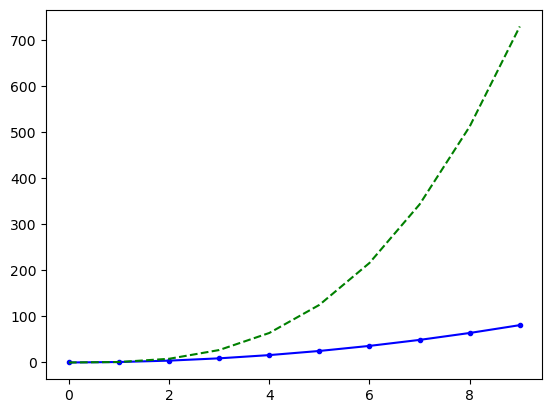

In [8]:
# MATLAB style line color and style
fig, ax = plt.subplots()
# blue line with dots
ax.plot(x, x**2, 'b.-')
# green dashed line
ax.plot(x, x**3, 'g--');

Colors can also be defined by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments.

There is also a [large list of named colors](https://matplotlib.org/stable/gallery/color/named_colors.html) available on the Matplotlib webset.

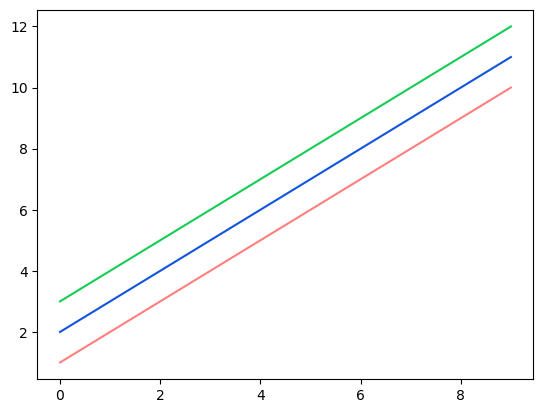

In [9]:
fig, ax = plt.subplots()

# half-transparant red
ax.plot(x, x + 1, color="red", alpha=0.5)
# RGB hex code for a bluish color
ax.plot(x, x + 2, color="#1155dd")
# RGB hex code for a greenish color
ax.plot(x, x + 3, color="#15cc55");

### Line and marker styles

The line width can be changed using the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

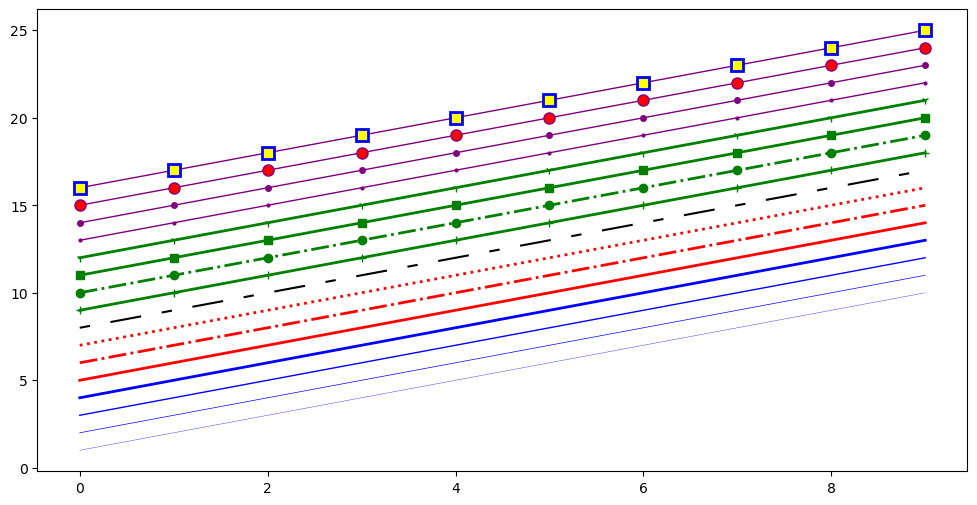

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x, x + 1, color='blue', linewidth=0.25)
ax.plot(x, x + 2, color='blue', linewidth=0.50)
ax.plot(x, x + 3, color='blue', linewidth=1.00)
ax.plot(x, x + 4, color='blue', linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x + 5, color='red', lw=2, linestyle='-')
ax.plot(x, x + 6, color='red', lw=2, ls='-.')
ax.plot(x, x + 7, color='red', lw=2, ls=':')

# custom dash
(line,) = ax.plot(x, x + 8, color='black', lw=1.50)
line.set_dashes([5, 10, 15, 10])  # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x + 9, color='green', lw=2, ls='-', marker='+')
ax.plot(x, x + 10, color='green', lw=2, ls='-.', marker='o')
ax.plot(x, x + 11, color='green', lw=2, ls='-', marker='s')
ax.plot(x, x + 12, color='green', lw=2, ls='-', marker='1')

# marker size and color
ax.plot(x, x + 13, color='purple', lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x + 14, color='purple', lw=1, ls='-', marker='o', markersize=4)
ax.plot(
    x,
    x + 15,
    color='purple',
    lw=1,
    ls='-',
    marker='o',
    markersize=8,
    markerfacecolor='red',
)
ax.plot(
    x,
    x + 16,
    color='purple',
    lw=1,
    ls='-',
    marker='s',
    markersize=8,
    markerfacecolor='yellow',
    markeredgewidth=2,
    markeredgecolor='blue',
);

## Simple plots of NWIS data

We will use a the `hydrofunctions` package to retrieve NWIS data as a pandas dataframe. We will talk more about pandas later

In [ ]:
%matplotlib inline
import hydrofunctions as hf

In [6]:
import dataretrieval

In [ ]:
data

In [4]:
dataretrieval.__version__

'1.0.2'

Below we retrieve data for two sites and make a simple `matplotlib` plot.

In [ ]:
site_info = nwis.get_record(sites=sitelist, service='site')

In [ ]:
sites = ["07010000", "06716500"]

start = "2015-10-01"
end = "2016-09-30"
data = hf.NWIS(sites, "dv", start, end)
print(data.ok)

In [ ]:
data

In [ ]:
data.df("discharge")

In [ ]:
data.df().plot()

## More figure customization

### Adjusting figure layout

That was easy, but it isn't so pretty with overlapping figure axes and labels, right?

Overlapping figures can be dealt with using the `fig.tight_layout` method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, "r")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("title")

fig.tight_layout();

## Figure size, aspect ratio and DPI

`matplotlib` allows the aspect ratio, DPI and figure size to be specified when the `Figure` object is created, using the `figsize` and `dpi` keyword arguments. `figsize` is a tuple of the width and height of the figure in inches, and `dpi` is the dots-per-inch (pixel per inch). To create an 800x400 pixel, 100 dots-per-inch figure, we can do: 

In [ ]:
fig, axes = plt.subplots(figsize=(12, 3), dpi=100)

axes.plot(x, y, "r")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title("title");

## Saving figures

To save a figure to a file, the `savefig` method in the `Figure` class is used:

In [ ]:
fig.savefig(output_path / "filename.png")

The DPI can also optionally be specified and different different output formats selected:

In [ ]:
fig.savefig(output_path / "filename.png", dpi=200)

### What formats are available and which ones should be used for best quality?

`matplotlib` can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, and PDF. For scientific papers, use PDF whenever possible. ($\LaTeX$ documents compiled with `pdflatex` can include PDFs using the `includegraphics` command $-$ PDFs can also be edited using Adobe Illustrator and other similar graphics programs). 

The figure type (pdf, png, *etc.*) can be changed simply by changing the file extension.

In [ ]:
fig.savefig(output_path / "filename.svg")

## Formatting text: $\LaTeX$, fontsize, font family

The figure above is functional, but it does not (yet) satisfy the criteria for a figure used in a publication. First and foremost, it may be neccesary to use $\LaTeX$ formatted text, and second, it may be necessary to adjust the font size to appear right in a publication.

`matplotlib` has great support for $\LaTeX$. All that is required to incorporate $\LaTeX$ text is to encapsulate any text (legend, title, label, etc.) in dollar signs. For example, `'$y=x^3$'`.

But here we can run into a slightly subtle problem with $\LaTeX$ code and Python text strings. In $\LaTeX$, the backslash is frequently used in commands, for example `\alpha` to produce the symbol $\alpha$. But the backslash already has a meaning in Python strings (the escape code character). To avoid Python messing up our latex code, we need to use "raw" text strings. Raw text strings are prepended with an '`r`', like `r'\alpha'` instead of `'\alpha'`:

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.set_xlabel(r"$\alpha$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_title("title")
ax.legend(loc="upper left");

## Control over axis appearance

The appearance of the axes is an important aspect of a figure that often must be modified to make publication quality graphics. It also may be necessary to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. Methods for  controlling axis properties and appearance in a `matplotlib` figure are explored in this section.

### Plot range

Axes ranges can be configured using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatrically getting "tightly fitted" axes ranges:

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis("tight")
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 3])
axes[2].set_title("custom axes range");

### Logarithmic scale

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in `matplotlib`. Each of the axes' scales are set seperately using `set_xscale` and `set_yscale` methods which accept one parameter (with the value "log" in this case):

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

Logarithmic scales can also be specified using `semilogx()`, `semilogy()`, or `loglog()`. What are the differences in the figures plotted using `.set_yscale("log")` and `.semilogy()`?

### Placement of ticks and custom tick labels

The axis ticks can be explicitly set using with `set_xticks` and `set_yticks`, which both take a list of values for where on the axis the ticks are to be placed. The `set_xticklabels` and `set_yticklabels` methods can be used to provide a list of custom text labels for each tick location:

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(
    [r"$\alpha$", r"$\beta$", r"$\gamma$", r"$\delta$", r"$\epsilon$"],
    fontsize=18,
)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
# use LaTeX formatted labels
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18);

There are a number of more advanced methods for controlling major and minor tick placement in `matplotlib` figures, such as automatic placement according to different policies. See http://`matplotlib`.org/api/ticker_api.html for details.

### Axis grid

With the `grid` method in the axis object, grid lines can be turned on and off. The appearance of the grid lines can also be customized using the same keyword arguments as the `plot` function:

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color="b", alpha=0.5, linestyle="dashed", linewidth=0.5);

### Twin axes

Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. `matplotlib` supports this with the `twinx` and `twiny` functions:

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")

ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red");

## Other 2D plot styles

In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the `matplotlib` plot gallery for a complete list of available plot types: http://`matplotlib`.org/gallery.html. Some of the more useful ones are show below:

In [ ]:
xx = np.linspace(-0.75, 1.0, 100)
n = np.array([0, 1, 2, 3, 4, 5])

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

axes[0].scatter(xx, xx + 0.25 * np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5)
axes[3].set_title("fill_between");

### Histograms

In [ ]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

## Text annotation

Annotating text in `matplotlib` figures can be done using the `text` function. It supports LaTeX formatting just like axis label texts and titles:

In [ ]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$\alpha y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

## Colormap and contour figures

Colormaps and contour figures are useful for plotting functions of two variables. A colormap will be used to encode one dimension of the data in most of these functions. There are a number of predefined colormaps. It is relatively straightforward to define custom colormaps. For a list of pre-defined colormaps, see: http://www.scipy.org/Cookbook/`matplotlib`/Show_colormaps

In [ ]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5


def flux_qubit_potential(phi_m, phi_p):
    return (
        2
        + alpha
        - 2 * np.cos(phi_p) * np.cos(phi_m)
        - alpha * np.cos(phi_ext - 2 * phi_p)
    )

In [ ]:
phi_m = np.linspace(0, 2 * np.pi, 100)
phi_p = np.linspace(0, 2 * np.pi, 100)
X, Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

### pcolor

In [ ]:
fig, ax = plt.subplots()

p = ax.pcolor(
    X / (2 * np.pi),
    Y / (2 * np.pi),
    Z,
    cmap=plt.cm.RdBu,
    vmin=abs(Z).min(),
    vmax=abs(Z).max(),
)
cb = fig.colorbar(p, ax=ax)

### imshow

In [ ]:
fig, ax = plt.subplots()

im = plt.imshow(
    Z,
    cmap=plt.cm.RdBu,
    vmin=abs(Z).min(),
    vmax=abs(Z).max(),
    extent=[0, 1, 0, 1],
)
im.set_interpolation("bilinear")

cb = fig.colorbar(im, ax=ax)

### contour

In [ ]:
fig, ax = plt.subplots()

cnt = plt.contour(
    Z,
    cmap=plt.cm.RdBu,
    vmin=abs(Z).min(),
    vmax=abs(Z).max(),
    extent=[0, 1, 0, 1],
)

## Miscellaneous topics


### Using FloPy styles to make figures for USGS publications

FloPy's plotting routines can be used with built in styles from the `styles` module. The `styles` module takes advantage of matplotlib's temporary styling routines by reading in pre-built style sheets. Two different types of styles have been built for flopy: `USGSMap()` and `USGSPlot()` styles which can be used to create report quality figures. The styles module also contains a number of methods that can be used for adding axis labels, text, annotations, headings, removing tick lines, and updating the current font.


Addition information on use of flopy styles can be found in https://github.com/modflowpy/flopy/blob/develop/examples/Notebooks/flopy3.3_PlotMapView.ipynb and https://github.com/modflowpy/flopy/blob/develop/examples/Notebooks/flopy3.3_PlotCrossSection.ipynb

In [ ]:
%matplotlib inline
from flopy.plot import styles

#### Make a timeseries

In [ ]:
with styles.USGSPlot():
    fig, ax = plt.subplots()
    ax.plot([0, 100], [0, 10])
    styles.heading(ax=ax, idx=0)

Change the font used in the timeseries plot above. The fonts available to matplotlib can be found using

```
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
```

A possible option is family `sans-serif` fontname `Arial Narrow`.

#### Make a map

In [ ]:
x = np.random.random((10,10))
X, Y = np.meshgrid(np.arange(0, 10, 1), np.arange(0, 10, 1))
with styles.USGSMap():
    plt.pcolormesh(X, Y, x)

### Creating animations with matplotlib

We will animate the sin function over the range of 0 to 2$\pi$. The first step is to make a numpy array from 0 to 2 using `arange` to define the variable `x`. Start with a interval of `x` on the order of 0.1.

After creating `x` animate `np.sin()` for all values of `x` using the code below.

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(4)
fig.set_figwidth(5)

for idx in range(x.shape[0]):

    ax.cla()

    ax.set_xlim(0, 2)
    ax.set_ylim(-1.1, 1.1)

    i1 = idx + 1
    y = np.sin(x[:i1] * np.pi)
    line = ax.plot(x[:i1], y)
    ax.axhline(y=0, lw=0.5, color="black")
    title_text = fig.suptitle(f"{x[idx]:>2.2f} $\pi$")

    display(fig)
    clear_output(wait=True)
    plt.pause(0.1)

Modify the animation to show the sine function for the full range of 0 to 2$\pi$ but show the time as a point on the curve that moves in time.

### Using PdfPages to create multi-page PDFs

Use your sine function plot to create a pdf for each time. A PdfPages example can be found in the matplotlib gallery at https://matplotlib.org/stable/gallery/misc/multipage_pdf.html

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

In [ ]:
path = pl.Path(f"{output_path}/multipage_pdf.pdf")
y = np.sin(x * np.pi)

with PdfPages(path) as pdf:
    for idx, (xx, yy) in enumerate(zip(x, y)):
        fig, ax = plt.subplots(nrows=1, ncols=1)
        fig.set_figheight(4)
        fig.set_figwidth(5)

        ax.set_xlim(0, 2)
        ax.set_ylim(-1.1, 1.1)

        # add your plotting
        ax.plot(x, y)
        ax.plot(
            xx, yy, lw=0, marker="o", ms=4, mfc="red", mec="red", clip_on=False
        )

        ax.set_title(r"Page {} - {:6.2f} $\pi$".format(idx + 1, xx))
        pdf.savefig()  # saves the current figure into a pdf page
        plt.close()